In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

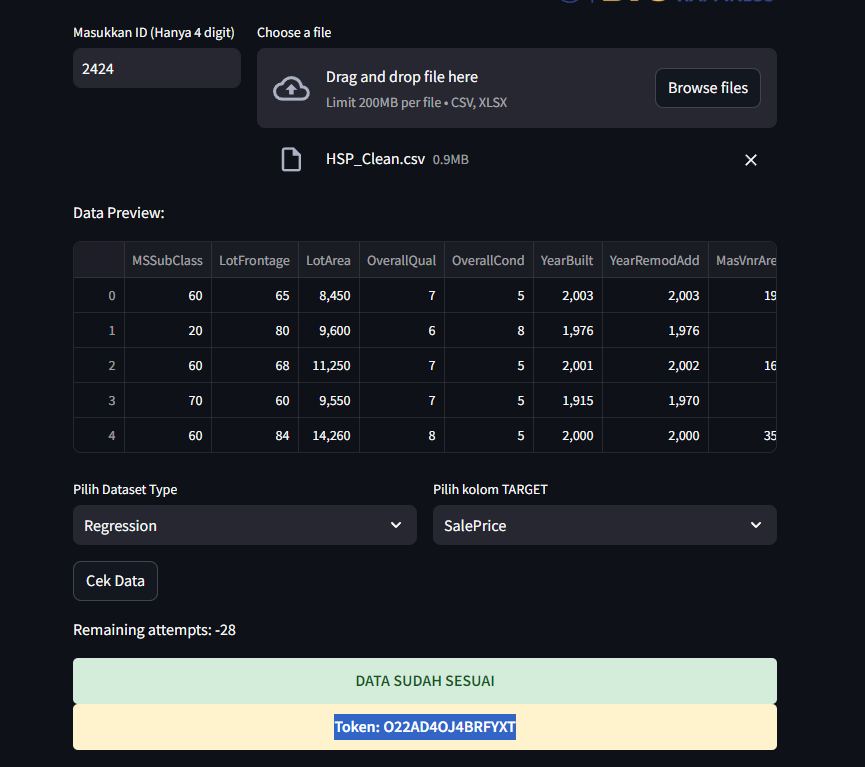

In [79]:
df = pd.read_csv('/content/HSP.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [80]:
df.shape

(1460, 81)

In [81]:
df = df.drop('Id', axis=1)
df.head(3)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  

[3 rows x 80 columns]

In [82]:
# SHOW ME THE PERCENTAGE OF NaNs PRESENT IN EACH COLUMN
def missing_data(df):
    total_missing = df.isnull().sum().sort_values(ascending = False)
    Percentage = (total_missing / len(df)) * 100
    summary_df = pd.concat([total_missing, Percentage], axis=1, keys=['Data Missing', 'Data Percentage Missing'])
    return summary_df

missing_data_df = missing_data(df)
missing_data_df.style.background_gradient(cmap='Greys')

**Missing Value lebih memiliki Precentage tinggi (Hipotesis harusnya di drop)**

PoolQC	1453	99.520548

MiscFeature	1406	96.301370

Alley	1369	93.767123

Fence	1179	80.753425


In [83]:
import re

def has_numbers(inputString):
  return bool(re.search(r'\d', inputString))

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [85]:
# num_col = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).apply(lambda x: x.str.contains('\d').any())]
num_col = df.select_dtypes(include=['int', 'float'])
num_col

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0             2003       196.0         706           0  ...           0   
1             1976         0.0         978           0  ...         298   
2             2002       162.0         486           0  ...           0   
3             1970         0.0         216           0  ...           0   
4             2000       350.0         655           0  ...         192   
...            ...         ...         ...         ...  ...         ...   
1455          2000         0.0           0           0  ...           0   
1456          1988       119.0         790         163  ...         349   
1457          2006         0.0         275           0  ...           0   
1458          1996         0.0          49        1029  ...         366   
1459          1965         0.0         830         290  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008     208500  
1          5    2007     181500  
2          9    2008     223500  
3          2    2006     140000  
4         12    2008     250000  
...      ...     ...        ...  
1455       8    2007     175000  
1456       2    2010     210000  
1457       5    2010     266500  
1458       4    2010     142125  
1459       6    2008     147500  

[1460 rows x 37 columns]

In [86]:
cat_col = df.select_dtypes(include=['object'])

In [87]:
cat_col_column = cat_col.columns
num_col_column = num_col.columns

In [88]:
df[cat_col_column].isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
GarageType         81
GarageCond         81
GarageQual         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
Electrical          1
KitchenQual         0
CentralAir          0
Functional          0
HeatingQC           0
Heating             0
PavedDrive          0
SaleType            0
MSZoning            0
Street              0
Condition2          0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
SaleCondition       0
dtype: int64

In [89]:
for col in cat_col_column:
    mode = df[col].mode().iloc[0]  # Ambil modus pertama jika ada beberapa modus
    df[col].fillna(mode, inplace=True)

In [90]:
df[num_col_column].isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
OpenPorchSF        0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
MSSubClass         0
BedroomAbvGr       0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
EnclosedPorch      0
FullBath           0
HalfBath           0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
BsmtHalfBath       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
SalePrice          0
dtype: int64

In [91]:
num_col_selected = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

<ipython-input-92-e2e99cbab928>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], bins=20)
<ipython-input-92-e2e99cbab928>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], bins=20)
<ipython-input-92-e2e99cbab928>:7: UserWarning: 

`distplot` is a deprecated function and will be 

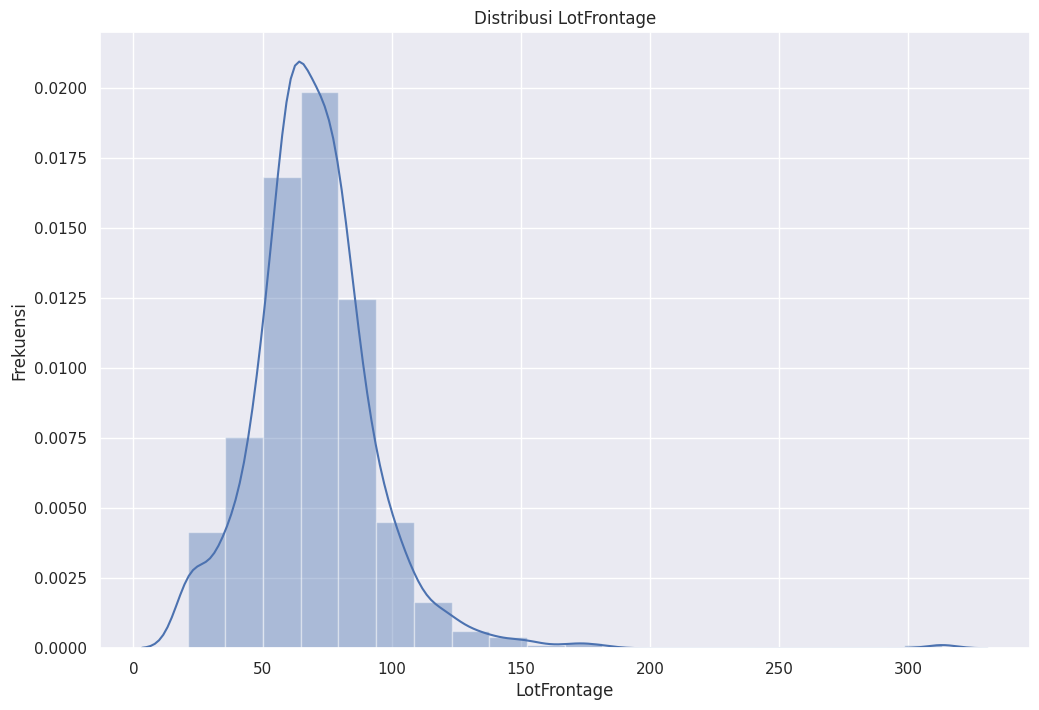

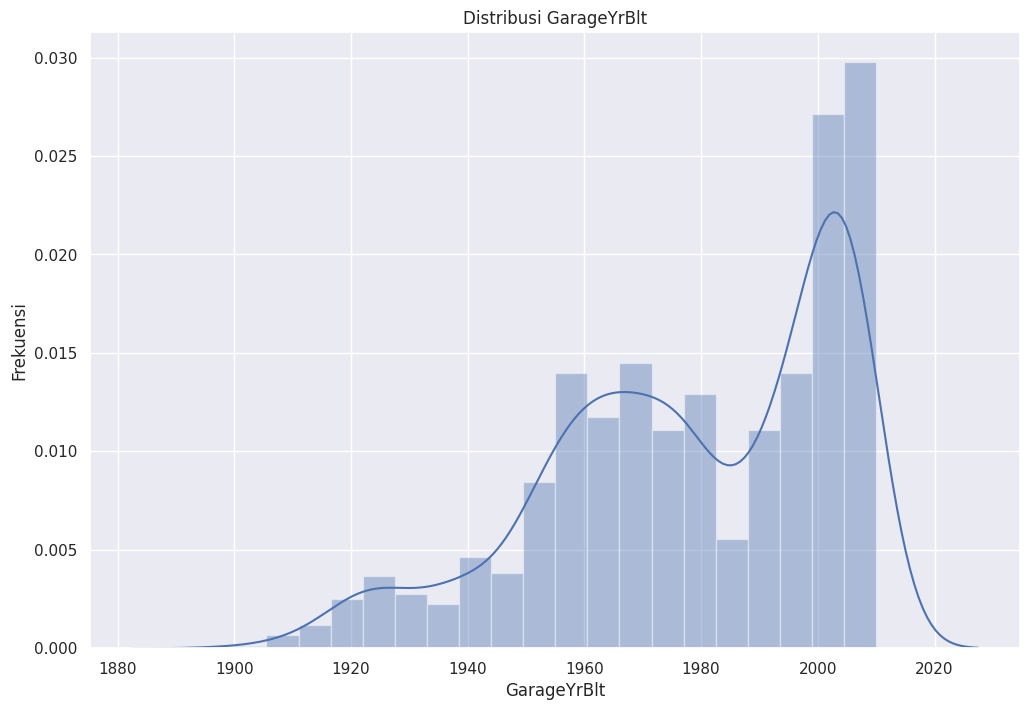

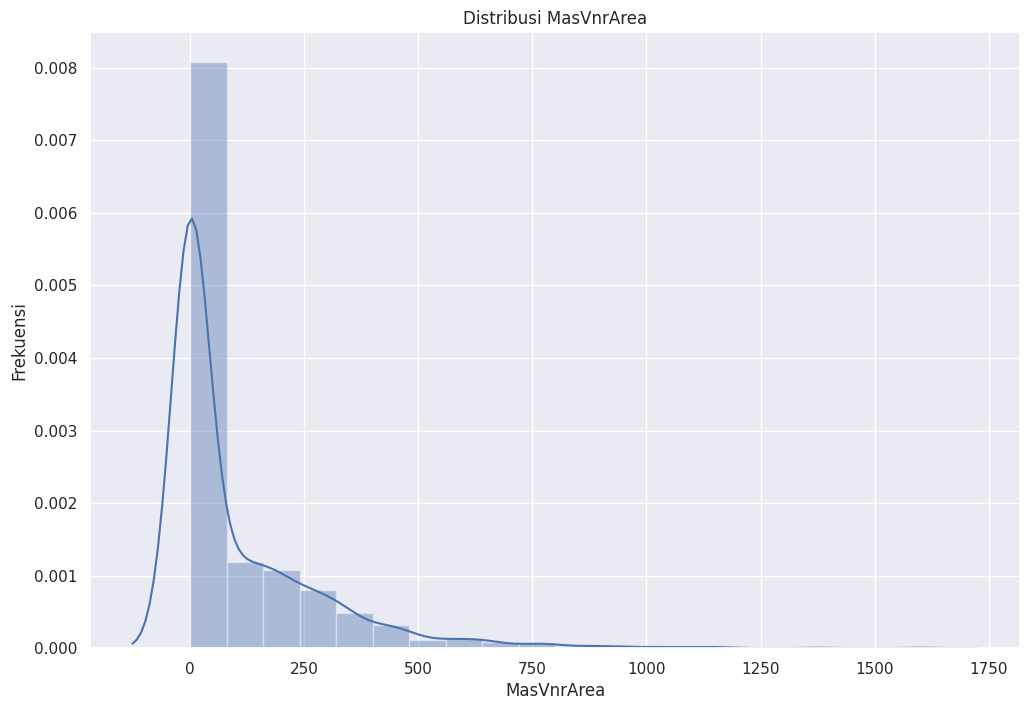

In [92]:
sns.set(rc={'figure.figsize':(12,8)})

# Iterasi melalui setiap kolom numerik
for col in num_col_selected:
    # Buat subplot
    plt.figure()
    sns.distplot(df[col], bins=20)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

# Tampilkan semua plot
plt.show()

In [93]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=True)
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

In [94]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  Grvl      Reg   
1          20       RL         80.0     9600   Pave  Grvl      Reg   
2          60       RL         68.0    11250   Pave  Grvl      IR1   
3          70       RL         60.0     9550   Pave  Grvl      IR1   
4          60       RL         84.0    14260   Pave  Grvl      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0     Gd  MnPrv        Shed   
1         Lvl    AllPub       FR2  ...        0     Gd  MnPrv        Shed   
2         Lvl    AllPub    Inside  ...        0     Gd  MnPrv        Shed   
3         Lvl    AllPub    Corner  ...        0     Gd  MnPrv        Shed   
4         Lvl    AllPub       FR2  ...        0     Gd  MnPrv        Shed   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [95]:
for col in df.columns:
    print(f"Nilai unik pada kolom '{col}':")
    print(df[col].nunique())
    print(df[col].unique())
    print()  # Tambahkan baris kosong untuk pemisah

Nilai unik pada kolom 'MSSubClass':
15
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

Nilai unik pada kolom 'MSZoning':
5
['RL' 'RM' 'C (all)' 'FV' 'RH']

Nilai unik pada kolom 'LotFrontage':
111
[ 65.          80.          68.          60.          84.
  85.          75.          70.04995837  51.          50.
  70.          91.          72.          66.         101.
  57.          44.         110.          98.          47.
 108.         112.          74.         115.          61.
  48.          33.          52.         100.          24.
  89.          63.          76.          81.          95.
  69.          21.          32.          78.         121.
 122.          40.         105.          73.          77.
  64.          94.          34.          90.          55.
  88.          82.          71.         120.         107.
  92.         134.          62.          86.         141.
  97.          54.          41.          79.         174.
  99.          67.          83.   

In [98]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
df = pd.get_dummies(df, columns=cat_col)
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 288 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(285)
memory usage: 3.2 MB


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 288 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(285)
memory usage: 3.2 MB


In [100]:
df.shape[1]

288

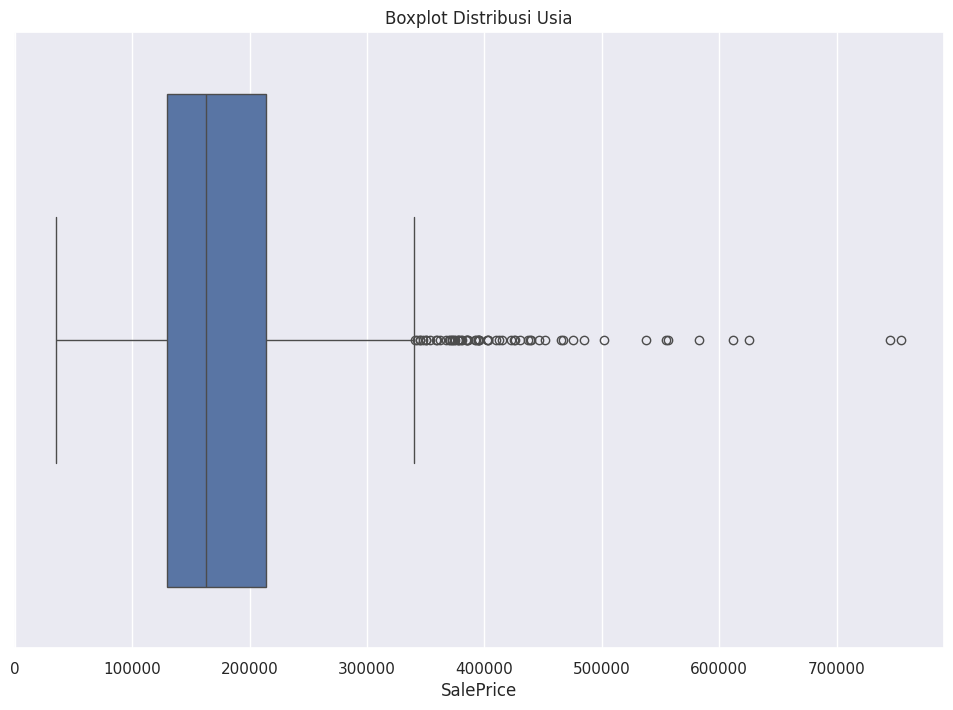

In [103]:
sns.boxplot(x='SalePrice', data=df)
plt.title('Boxplot Distribusi Usia')
plt.show()

In [104]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['SalePrice'] = df['SalePrice'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

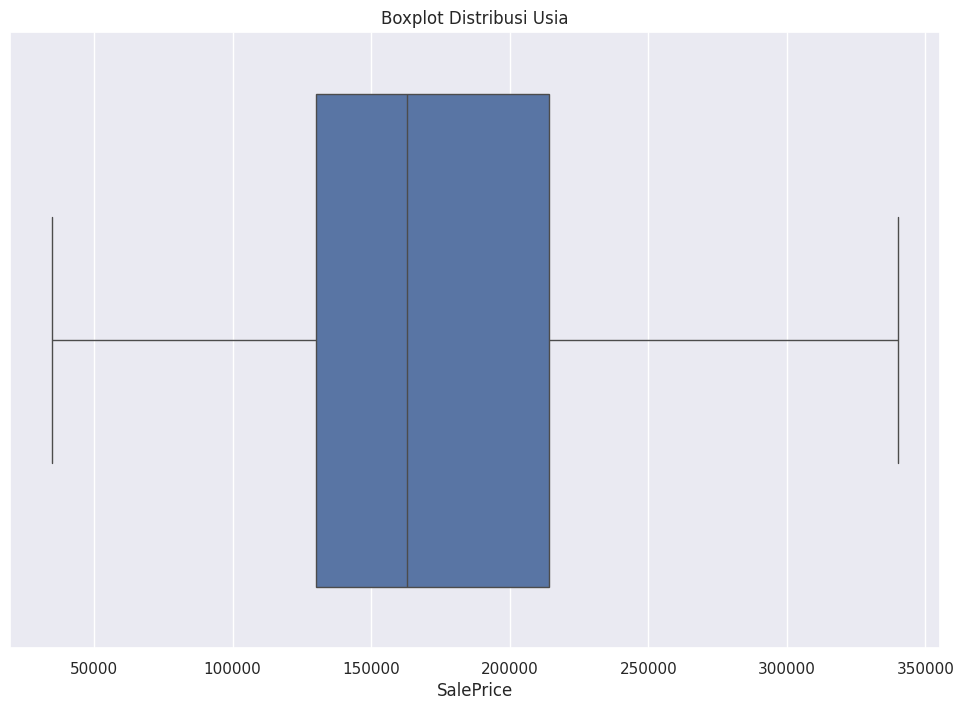

In [105]:
sns.boxplot(x='SalePrice', data=df)
plt.title('Boxplot Distribusi Usia')
plt.show()

In [106]:
df.duplicated().sum()

0

In [107]:
df.to_csv("HSP_Clean.csv", index=False)

In [ ]:
asd

# Trash

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df['SalePrice'].unique()

In [ ]:
important_num_cols = list(df_num.corr()["SalePrice"][(df_num.corr()["SalePrice"]>0.50) | (df_num.corr()["SalePrice"]<-0.50)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]

In [ ]:
print("Missing Values by Column")
print(df.isna().sum())
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

In [ ]:
sns.pairplot(df[important_num_cols])

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression

In [ ]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [ ]:
X = pd.get_dummies(X, columns=cat_cols)

In [ ]:
important_num_cols.remove("SalePrice")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [ ]:
important_num_cols

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse


def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [ ]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}

In [ ]:
df_baru = pd.concat([X[important_num_cols], y], axis=1)

In [ ]:
df_baru

In [ ]:
df_baru.isnull().sum()

In [ ]:
df_baru.duplicated().sum()

In [ ]:
df_baru.to_csv('HSP_Clean.csv', index=False)



---



In [ ]:
asd

In [ ]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["SalePrice"] = np.log1p(df["SalePrice"])

#Check the new distribution
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

In [ ]:
df.drop(['SalePrice'], axis=1, inplace=True)

In [ ]:
list(set(df.dtypes.tolist()))

df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

In [ ]:
corrmat = df_num.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

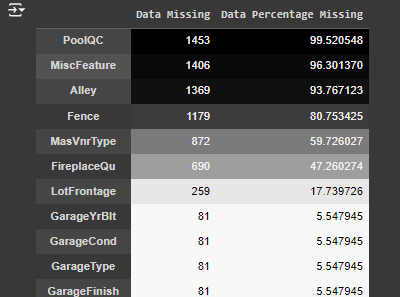

In [ ]:
df['Alley'].value_counts()

In [ ]:
df.columns

In [ ]:
# no sense 99 missing valueessssss
df.drop('PoolQC', axis=1, inplace=True)
df.drop('MiscFeature', axis=1, inplace=True)
df.drop('Alley', axis=1, inplace=True)
df.drop('Fence', axis=1, inplace=True)
df.drop('MasVnrType', axis=1, inplace=True)
df.drop('FireplaceQu', axis=1, inplace=True)

In [ ]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

In [ ]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

In [ ]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

In [ ]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

In [ ]:
df = df.drop(['Utilities'], axis=1)

In [ ]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [ ]:
df["Functional"] = df["Functional"].fillna("Typ")

In [ ]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [ ]:
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

In [ ]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

In [ ]:
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

In [ ]:
df['MSSubClass'] = df['MSSubClass'].fillna("None")

In [ ]:
# SHOW ME THE PERCENTAGE OF NaNs PRESENT IN EACH COLUMN
def missing_data(df):
    total_missing = df.isnull().sum().sort_values(ascending = False)
    Percentage = (total_missing / len(df)) * 100
    summary_df = pd.concat([total_missing, Percentage], axis=1, keys=['Data Missing', 'Data Percentage Missing'])
    return summary_df

missing_data_df = missing_data(df)
missing_data_df.style.background_gradient(cmap='Greys')

In [ ]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [ ]:
df.info()

In [ ]:
#MSSubClass=The building class
df['MSSubClass'] = df['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('Fireplaces', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(df[c].values))
    df[c] = lbl.transform(list(df[c].values))

# shape
print('Shape df: {}'.format(df.shape))

In [ ]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df[feat] = boxcox1p(df[feat], lam)

#df[skewed_features] = np.log1p(df[skewed_features])

In [ ]:
df = pd.get_dummies(df)
print(df.shape)

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Price in INR", axis=1)
y = df["Price in INR"]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
train = df[:ntrain]
test = df[ntrain:]

In [ ]:
sdf

In [ ]:
list(set(df.dtypes.tolist()))

df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
df.duplicated().sum()

In [ ]:
asd

In [ ]:
df.info()

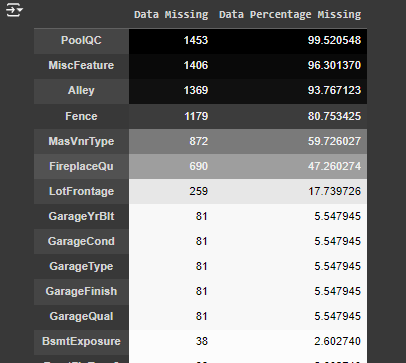

In [ ]:
df.describe(include = "number")

In [ ]:
#categorical columns
cat_data = df[df.select_dtypes('object').columns]
print(f"There are {cat_data.shape[1]} categorical features in cat_data")

In [ ]:
df.describe(include = "object")

In [ ]:
# select numeric columns
num_data = df[df.select_dtypes(include='number').columns]
print(f"There are {num_data.shape[1]} features in house_data1")

In [ ]:
# numerical features with na or missing values prop >=0.3
na_numCols = num_data.columns[num_data.isnull().mean()> 0.0].tolist()
num_data[na_numCols].isna().mean()

In [ ]:
# NA propoortion in house_data1
df.isna().mean().mean()

In [ ]:
# SHOW ME THE PERCENTAGE OF NaNs PRESENT IN EACH COLUMN
def missing_data(df):
    total_missing = df.isnull().sum().sort_values(ascending = False)
    Percentage = (total_missing / len(df)) * 100
    summary_df = pd.concat([total_missing, Percentage], axis=1, keys=['Data Missing', 'Data Percentage Missing'])
    return summary_df

missing_data_df = missing_data(df)
missing_data_df.style.background_gradient(cmap='Greys')